In [1]:
#import dependencies
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [2]:
#read in dataset
crypto_data_df = pd.read_csv(Path('Data/crypto_data.csv'))

In [3]:
#include only actively traded cryptocurrencies
active_crypto_df = crypto_data_df[crypto_data_df['IsTrading']==True]


In [4]:
#coin name and trading status columns are dropped, null values discarded
df = active_crypto_df.drop(columns=['IsTrading', 'CoinName']).dropna()

In [5]:
#dataframe is filtered for cryptocurrencies that have been mined
mined_crypto_df = df[df['TotalCoinsMined']>=1]

#shape determined
mined_crypto_df.shape

(532, 5)

In [6]:
#dummy variables are created for algorithm and prooftype columns
numeric_crypto_df = pd.get_dummies(mined_crypto_df)

#shape determined
numeric_crypto_df.shape

(532, 909)

### By creating dummies, the number of columns increased greatly (from 5 to 909) to account for the many values converted to numeric, the number of rows stay the same.

In [7]:
#data is scaled with standard scalar
scaler = StandardScaler().fit(numeric_crypto_df)
crypto_clean_df = scaler.transform(numeric_crypto_df)

#original shape determined
crypto_clean_df.shape

(532, 909)

In [8]:
#pca model created and initialized to explained variance of 90%
pca = PCA(n_components=0.90)

#pca model used to reduce dimensions of the scaled dataset
crypto_pca = pca.fit_transform(crypto_clean_df)

#shape of the reduced dataset examined for feature reduction
crypto_pca.shape

(532, 441)

### The number of features decreased from 909 to 441.

In [9]:
#t-SNE model created
tsne = TSNE(learning_rate=145)

#t-SNE model used to reduce dimensions of the pca reduced dataset
crypto_tsne = tsne.fit_transform(crypto_pca)

#shape of the reduced dataset examined for feature reduction
crypto_tsne.shape

(532, 2)

In [10]:
#create a dataframe for the final t-SNE dimensions
tsne_df = pd.DataFrame(columns=['x', 'y'])

# The first column of transformed features
tsne_df['x'] = crypto_tsne[:,0]

# The second column of transformed features
tsne_df['y'] = crypto_tsne[:,1]

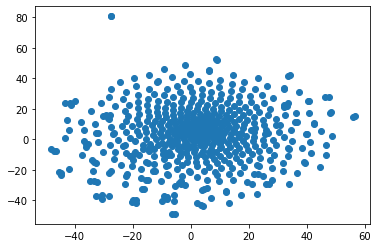

In [11]:
#plot t-SNE features
plt.scatter(x=tsne_df['x'], y=tsne_df['y'])
plt.show()

### There does not seem to be distinct clusters. More of single cloud.

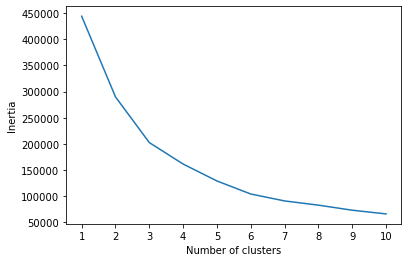

In [12]:
#inertia list initialized
inertia = []

#define k as 1 to 10 inclusive
k = list(range(1, 11))

#for loop used to create a list of inerias
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

#define a dataframe to plot the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

#plot created to examine any elbows that may exist
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### The plot starts to look a bit linear after k=7.  However, the inertia is high and the curve is gradual, instead of a bend into a linear relationship.

## I would not recommend to my clients to group cryptocurrencies to a classification system.  There does not seem to be a strong relationship between the features creating descernable clusters. The elbow bend in the K means model is weak and the inertia values are high.